##  Introduction

The COVID-19 pandemic has generated an immense volume of scholarly articles, presenting a challenge for researchers and policymakers to stay abreast of evolving trends. This project will apply Natural Language Processing (NLP) techniques for topic modeling and trend analysis to extract valuable insights from the COVID-19 Open Research Dataset (CORD-19).The project aims to (1) clearly defined and interpret topics derived from the scientific literature (2) Gain insights into the evolution of themes over time.

The project utilized the COVID-19 Open Research Dataset (CORD-19) published on Kaggle. This was prepared by the White House and a coalition of leading research groups. THe CORD-19 is a resource of over 1,000,000 scholarly articles, including over 400,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses.


## Data Wrangling Summary

In the process of preparing the dataset for analysis, a series of data wrangling steps were performed on a collection of research papers related to the COVID-19 pandemic. The key steps in the data wrangling process include:

1. Merging Metadata and JSON Files:
* Metadata from CSV files was merged with the content of JSON files.
* A random sample of 10,000 papers was chosen from the merged dataset.

2. Exclusion of Invalid and Missing Papers:
* Papers with invalid formats and those lacking metadata or having empty body text were excluded from the sample.
* The resulting dataset comprised 8,656 papers.

3. Language Identification and Filtering:
* A language column was created to identify the language of each paper.
* Of the 8,656 papers, 8,465 were identified as being in English, while non-English papers were dropped.

4. Text Cleaning:
* Both abstract and body text underwent a comprehensive cleaning process, including:
* Removal of special characters, numbers, and punctuation using regular expressions.
* Conversion of text to lowercase.
* Tokenization of text into words.
* Removal of stop words using NLTK's stop words.
* Application of stemming using the Porter Stemmer.

In [2]:
#import require packages
import zipfile
import os
import numpy as np
import pandas as pd 
import json

In [3]:
# Read the metadata CSV file with specified data types
meta_df = pd.read_csv('data/metadata.csv',
dtype = 'str')

meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cord_uid          1056660 non-null  object
 1   sha               373766 non-null   object
 2   source_x          1056660 non-null  object
 3   title             1056157 non-null  object
 4   doi               656780 non-null   object
 5   pmcid             389571 non-null   object
 6   pubmed_id         498932 non-null   object
 7   license           1056660 non-null  object
 8   abstract          821116 non-null   object
 9   publish_time      1054846 non-null  object
 10  authors           1032791 non-null  object
 11  journal           969338 non-null   object
 12  mag_id            0 non-null        object
 13  who_covidence_id  482935 non-null   object
 14  arxiv_id          14249 non-null    object
 15  pdf_json_files    373766 non-null   object
 16  pmc_json_files    

In [5]:
#Create class call FileReader to read information from JSON files
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)

    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'

root_path = 'C:\\Users\\patri\\Desktop\\Capstone 3 - Topic Modeling\\data\\'

all_json = os.listdir(os.path.join(root_path, "document_parses/pdf_json"))
all_json_paths = [os.path.join(root_path, "document_parses/pdf_json", s) for s in all_json]

# Fetching data from JSON files
first_row = FileReader(all_json_paths[0])
print(first_row)


0000028b5cc154f68b8a269f6578f21e31f62977: ... According to current live statistics at the time of editing this letter, Russia has been the third country in the world to be affected by COVID-19 with both new cases and death rates rising. It remain...


In [6]:
len(all_json_paths)

401214

### Merge Meta Data and Json files

In [7]:
# Extract 'paper_id' from file paths
json_file_ids = [os.path.splitext(os.path.basename(path))[0] for path in all_json_paths]

# Create a DataFrame with 'paper_id' and 'json_path'
json_paths_df = pd.DataFrame({'paper_id': json_file_ids, 'json_path': all_json_paths})

# Merge the metadata with JSON paths based on 'paper_id'
merged_df = pd.merge(meta_df, json_paths_df, left_on='sha', right_on='paper_id', how='inner')

# Display the first few rows of the merged DataFrame
merged_df.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,paper_id,json_path
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,...,BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,d1aafb70c066a2068b02786f8929fd9c900897fb,C:\Users\patri\Desktop\Capstone 3 - Topic Mode...
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,C:\Users\patri\Desktop\Capstone 3 - Topic Mode...
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,06ced00a5fc04215949aa72528f2eeaae1d58927,C:\Users\patri\Desktop\Capstone 3 - Topic Mode...
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,348055649b6b8cf2b9a376498df9bf41f7123605,C:\Users\patri\Desktop\Capstone 3 - Topic Mode...
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,5f48792a5fa08bed9f56016f4981ae2ca6031b32,C:\Users\patri\Desktop\Capstone 3 - Topic Mode...


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349471 entries, 0 to 349470
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   cord_uid          349471 non-null  object
 1   sha               349471 non-null  object
 2   source_x          349471 non-null  object
 3   title             349467 non-null  object
 4   doi               337279 non-null  object
 5   pmcid             313945 non-null  object
 6   pubmed_id         277922 non-null  object
 7   license           349471 non-null  object
 8   abstract          304361 non-null  object
 9   publish_time      349471 non-null  object
 10  authors           346608 non-null  object
 11  journal           318214 non-null  object
 12  mag_id            0 non-null       object
 13  who_covidence_id  0 non-null       object
 14  arxiv_id          13017 non-null   object
 15  pdf_json_files    349471 non-null  object
 16  pmc_json_files    276840 non-null  obj

### Randomly sample 10k papers and Merge with Meta Data

In [9]:
from tqdm import tqdm
import random

# Set a seed for reproducibility
random.seed(42)

# Sample 10,000 JSON files
sampled_json_paths = random.sample(all_json_paths, 10000)

# Initialize dictionary for data storage
dict_ = {'paper_id': [], 'doi': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': [], 'publish_time': []}

# Iterate over sampled JSON files
for idx, entry in tqdm(enumerate(sampled_json_paths), total=len(sampled_json_paths)):
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # Invalid paper format, skip

    # Get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    # No metadata or empty body text, skip this paper
    if len(meta_data) == 0 or len(content.body_text) == 0:
        continue

    # Append data to dictionary
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)

    # Create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0:
        # No abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # Abstract provided is too long for plot, take the first 300 words append with ...
        info = content.abstract.split(' ')[:100]
        total_chars = 0
        summary = ""
        for i in range(len(info)):
            total_chars += len(info[i])
            if total_chars > 40:
                summary += "<br>" + info[i]
                total_chars = 0
            else:
                summary += " " + info[i]
        dict_['abstract_summary'].append(summary + "...")
    else:
        # Abstract is short enough
        total_chars = 0
        summary = ""
        for i in range(len(content.abstract)):
            total_chars += len(content.abstract[i])
            if total_chars > 40:
                summary += "<br>" + content.abstract[i]
                total_chars = 0
            else:
                summary += " " + content.abstract[i]
        dict_['abstract_summary'].append(summary)

    # Get metadata information again (in case the previous check modified meta_data)
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

    try:
        # If more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # More than 2 authors, may be a problem when plotting, so take the first 2 append with ...
            total_chars = 0
            author_summary = ""
            for i in range(len(authors)):
                total_chars += len(authors[i])
                if total_chars > 40:
                    author_summary += "<br>" + authors[i]
                    total_chars = 0
                else:
                    author_summary += ". " + authors[i]
            dict_['authors'].append(author_summary + "...")
        else:
            # Authors will fit in the plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # If only one author - or Null value
        dict_['authors'].append(meta_data['authors'].values[0])

    # Add the title information, add breaks when needed
    try:
        total_chars = 0
        title_summary = ""
        for i in range(len(meta_data['title'].values[0])):
            total_chars += len(meta_data['title'].values[0][i])
            if total_chars > 40:
                title_summary += "<br>" + meta_data['title'].values[0][i]
                total_chars = 0
            else:
                title_summary += " " + meta_data['title'].values[0][i]
        dict_['title'].append(title_summary)
    # If title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])

    # Add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])

    # Add doi
    dict_['doi'].append(meta_data['doi'].values[0])

    # Add publish_time
    dict_['publish_time'].append(meta_data['publish_time'].values[0])

# Create a DataFrame from the dictionary
df_covid_sampled = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary', 'publish_time'])
df_covid_sampled.head()


100%|█████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [34:33<00:00,  4.82it/s]


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,publish_time
0,256a0dd8edfe03e0aa5c72a347651f4dff8068f3,10.3389/fnut.2021.727548,,"In the past 50 years, the world has seen a dra...",". Hoteit, Maha. Zoghbi, Edwina<br> Rady, Alis...",A s s e s s m e n t o f I n d u s t r i a...,Front Nutr,Not provided.,2021-10-21
1,5c17eca0e4fc83d345681775fa41b57f1ca6c3be,10.1186/s13054-020-03136-6,,ICU. The NuDesc score is approved and shows a ...,". Jäckel, Markus. Bemtgen, Xavier<br> Wengenm...",I s d e l i r i u m a s p e c i f i c ...,Crit Care,Not provided.,2020-07-09
2,5203dba131399e2c7e7b98a57524d92d40648944,10.3389/fnut.2020.583080,,"Since December 2019, the coronavirus disease (...",". Tsoupras, Alexandros. Lordan, Ronan<br> Zab...",T h r o m b o s i s a n d C O V I D - 1 9...,Front Nutr,Not provided.,2020-09-25
3,4ac2fe75e88e16b9d97c10f3a89e38f0b2c658ae,10.1530/ec-20-0567,Objective: COVID-19 in people with diabetes is...,People with diabetes are disproportionately af...,". Kempegowda, Punith. Melson, Eka<br> Johnson...",E f f e c t o f C O V I D - 1 9 o n t...,Endocr Connect,Objective: COVID-19 in people with diabetes i...,2021-03-05
4,2ed4902c047c625c9b2284d5cf239fe8695ff011,10.3201/eid2706.210135,,T he government of South Korea has implemented...,". Yum, Sujin. Hong, Kwan. Sohn, Sangho<br> K...",T r e n d s i n V i r a l R e s p i r a...,Emerg Infect Dis,Not provided.,2021-06-03


In [51]:
# Export the sampled DataFrame to a CSV file for later import
df_covid_sampled.to_csv('sample_covid_papers.csv', index=False)


In [3]:
# Import sampled dataframe
df_covid_sampled = pd.read_csv('sample_covid_papers.csv')

In [10]:
df_covid_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656 entries, 0 to 8655
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          8656 non-null   object
 1   doi               8350 non-null   object
 2   abstract          8656 non-null   object
 3   body_text         8656 non-null   object
 4   authors           8570 non-null   object
 5   title             8656 non-null   object
 6   journal           7900 non-null   object
 7   abstract_summary  8656 non-null   object
 8   publish_time      8656 non-null   object
dtypes: object(9)
memory usage: 608.8+ KB


In [12]:
# Check for missing values
missing_values = df_covid_sampled.isnull().sum()
print(missing_values)


paper_id               0
doi                  306
abstract            2428
body_text              0
authors               86
title                  0
journal              756
abstract_summary       0
publish_time           0
dtype: int64


In [54]:
from tqdm import tqdm
from langdetect import detect

# Create a new column 'language' to store the detected language
df_covid_sampled['language'] = None  # Initialize the column

# Iterate over the DataFrame with a progress bar
for idx, row in tqdm(df_covid_sampled.iterrows(), total=len(df_covid_sampled), desc="Detecting Languages"):
    body_text = row['body_text']
    if pd.notnull(body_text):
        df_covid_sampled.at[idx, 'language'] = detect(body_text)



Detecting Languages: 100%|█████████████████████████████████████████████████████████| 8656/8656 [10:16<00:00, 14.03it/s]


In [55]:
# Export the sampled DataFrame with language to a CSV file
df_covid_sampled.to_csv('df_covid_sampled_english.csv', index=False)


In [11]:
#read sampled dataframe with language
df_covid_sampled = pd.read_csv('df_covid_sampled_english.csv')

In [5]:
# Display the unique languages and their counts
print(df_covid_sampled['language'].value_counts())

en       8465
de         96
es         41
fr         39
nl          5
pt          3
ru          1
it          1
id          1
lt          1
pl          1
zh-cn       1
vi          1
Name: language, dtype: int64


In [12]:
# Drop rows where language is not 'en'
df_covid_sampled_english = df_covid_sampled[df_covid_sampled['language'] == 'en'].reset_index(drop=True)

In [7]:
df_covid_sampled_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          8465 non-null   object
 1   doi               8163 non-null   object
 2   abstract          6143 non-null   object
 3   body_text         8465 non-null   object
 4   authors           8392 non-null   object
 5   title             8465 non-null   object
 6   journal           7722 non-null   object
 7   abstract_summary  8465 non-null   object
 8   publish_time      8465 non-null   object
 9   language          8465 non-null   object
dtypes: object(10)
memory usage: 661.5+ KB


In [15]:
# Convert publish time to datetime
df_covid_sampled_english['publish_time'] = pd.to_datetime(df_covid_sampled_english['publish_time'], errors='coerce')


In [16]:
#Extract publication year
df_covid_sampled_english['publish_year'] = df_covid_sampled_english['publish_time'].dt.year

In [17]:
# Filter the DataFrame to include only articles published after the onset of the pandemic
pandemic_publications = df_covid_sampled_english[df_covid_sampled_english['publish_time'] >= '2020-01-01']


In [11]:
pandemic_publications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 8464
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   paper_id          7451 non-null   object        
 1   doi               7162 non-null   object        
 2   abstract          5388 non-null   object        
 3   body_text         7451 non-null   object        
 4   authors           7415 non-null   object        
 5   title             7451 non-null   object        
 6   journal           6717 non-null   object        
 7   abstract_summary  7451 non-null   object        
 8   publish_time      7451 non-null   datetime64[ns]
 9   language          7451 non-null   object        
 10  publish_year      7451 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 698.5+ KB


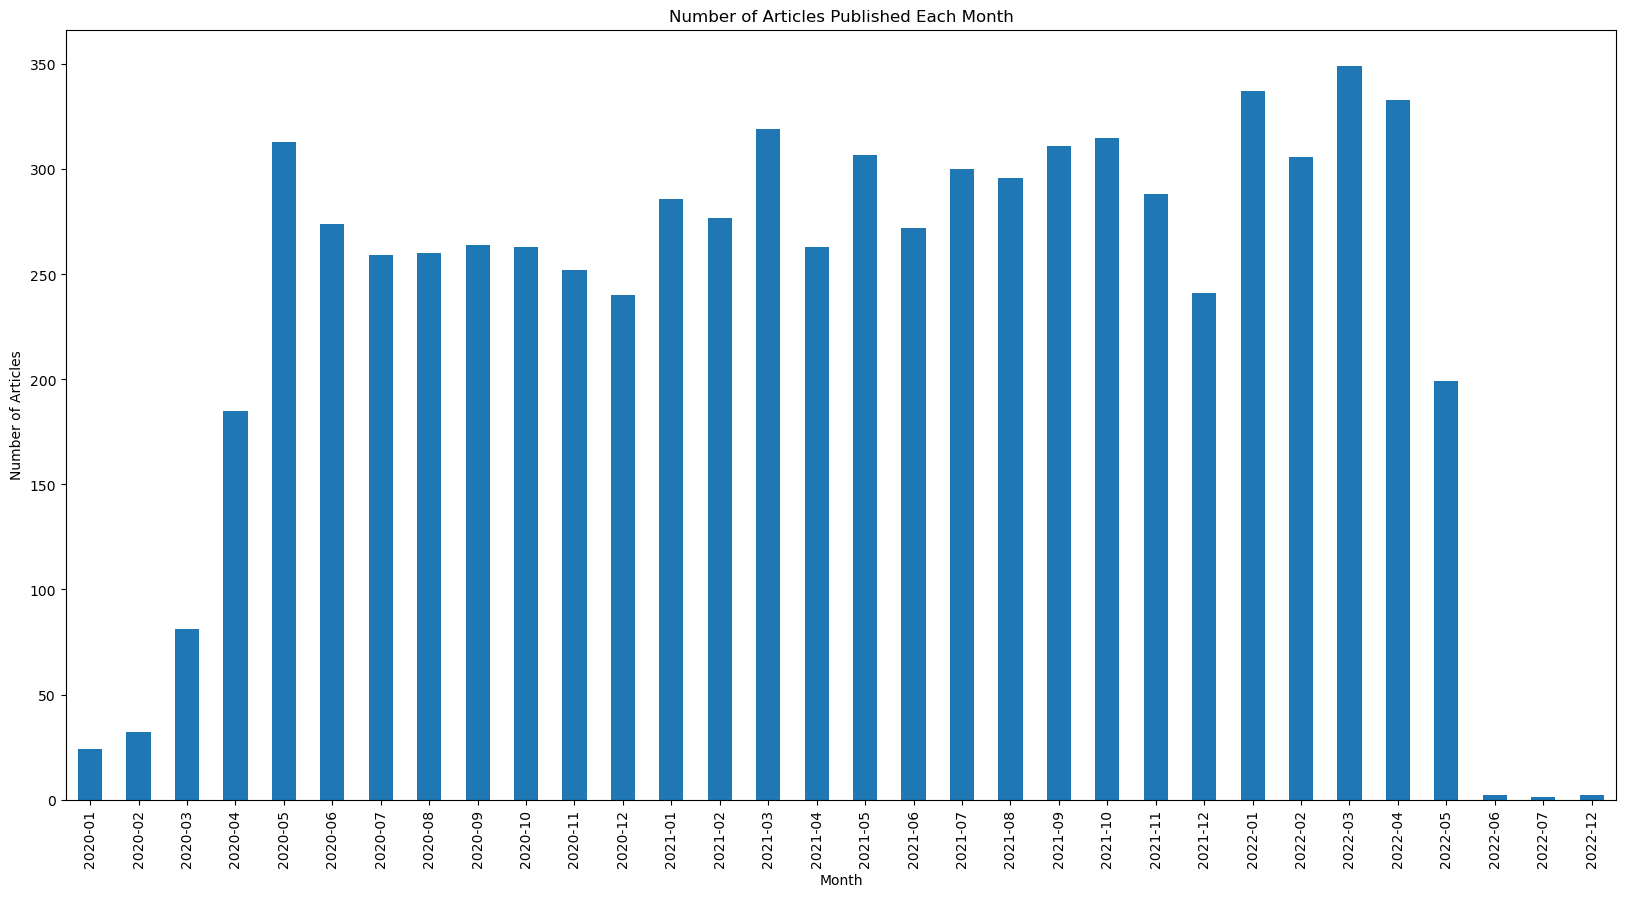

In [27]:
import matplotlib.pyplot as plt

# Plot graph of the number of articles for each month from January 2020 to December 2022
number_of_articles = pandemic_publications.groupby(pandemic_publications['publish_time'].dt.to_period('M')).size()
number_of_articles.plot(kind='bar', figsize=(20, 10), title='Number of Articles Published Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()


In [28]:
# Get summary statistics
summary_statistics = number_of_articles.describe()

# Print the summary statistics
print("Summary Statistics for Number of Articles Published Each Month:")
print(summary_statistics)

Summary Statistics for Number of Articles Published Each Month:
count     32.000000
mean     232.843750
std      108.797269
min        1.000000
25%      229.750000
50%      268.000000
75%      306.250000
max      349.000000
dtype: float64


In early 2020, there were less than 50 papers published January to february. We see that publications increase in march and a significant increase in publications in April when the world shut down due to the pandemic to nearly 200 publications. This then increased to over 300 publications the following month.The mean number of publication per month was 232 with a maximum of 349 in march 2022.

In [18]:
# Drop rows with missing values

pandemic_publications_nomissing = pandemic_publications.dropna()
pandemic_publications_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4713 entries, 3 to 8464
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   paper_id          4713 non-null   object        
 1   doi               4713 non-null   object        
 2   abstract          4713 non-null   object        
 3   body_text         4713 non-null   object        
 4   authors           4713 non-null   object        
 5   title             4713 non-null   object        
 6   journal           4713 non-null   object        
 7   abstract_summary  4713 non-null   object        
 8   publish_time      4713 non-null   datetime64[ns]
 9   language          4713 non-null   object        
 10  publish_year      4713 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 423.4+ KB


In [19]:
# Perform text cleaning on the 'abstract' and 'body_text' columns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')


In [27]:
# Function for text cleaning
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
pd.options.mode.chained_assignment = None  # Disable warning temporarily

# Define custom stop words
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www', 'http', 'No.' , 'no.', 'et.', 'al.', 'also',
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11', '12','13','14','15','16','17','18','19','20','21','22', 'p', 'r', 'e', 'u', 'l', 'j', 'n', '0', '95', 'ci'
]


# Function to clean text
def clean_text(text):
    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', str(text).lower())

    # Remove stop words
    stop_words = set(stopwords.words('english') + custom_stop_words)
    filtered_words = [word for word in words if word not in stop_words]

    # Apply stemming using the Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text

# Apply the clean_text function to the abstract and body text columns
pandemic_publications_nomissing['cleaned_abstract'] = pandemic_publications_nomissing['abstract'].apply(lambda x: clean_text(x))
pandemic_publications_nomissing['cleaned_body_text'] = pandemic_publications_nomissing['body_text'].apply(lambda x: clean_text(x))


In [29]:
# Export the clean dataframe to a CSV file
pandemic_publications_nomissing.to_csv('pandemic_publications_nomissing.csv', index=False)

In [35]:
# Read clean data
pandemic_publications_nomissing = pd.read_csv('pandemic_publications_nomissing.csv')

In [19]:
# Check for duplicate values in the 'doi' column
duplicate_dois = pandemic_publications_nomissing[pandemic_publications_nomissing.duplicated(subset=['doi'], keep=False)]
print(duplicate_dois[['doi', 'title']].head())


Empty DataFrame
Columns: [doi, title]
Index: []
